# Tutorial for NumPy
NumPy, which is short for "Numbers Python", is a library for efficiently processing large volumes of numerical data in Python.  Like pandas, it is extremely important for machine learning, particularly for computer vision.  

The core data structure in NumPy is the **nd-array** (n-dimensional array).  This data structure uses [strided memory](https://en.wikipedia.org/wiki/Stride_of_an_array) for storing elements and computation, which means that all elements of the same nd-array must be of the same Python type.

In this tutorial, we will show you the power of NumPy, and in particular, how it can be used for computer vision.

## Import Block
Typically you will see `import numpy as np` written, but this is just convention.  You can write this import statement in whatever way works best for you.

In [1]:
# Import NumPy
import numpy as np 

# We will also be using opencv, an image processing library
! pip install opencv-python
import cv2 as cv

# We will use os to find specific paths in our directories
import os

     |████████████████████████████████| 28.3MB 3.9MB/s eta 0:00:01


## Intro to nd-arrays
The **nd-array**, or n-dimensional array, data structure is the core element of the numpy library.  In one dimension, they are very similar to the Python `list` data structure.  In two dimensions, you can think of these as nd-arrays as being similar to a `list` of `lists`.

The main difference between a native Python `list` and a numpy `nd-array` is that an `nd-array` is much more computationally efficient.  Let's see this below.

### Why Numpy Arrays?  Comparing Times to Compute

In [2]:
import time
import matplotlib.pyplot as plt

# Store time to compute for Python list and numpy nd-array
list_times = []
nd_array_times = []
num_points = []

for i in range(10,10000010,1000000):
    
    num_points.append(i)
    
    python_list = [j for j in range(i)]
    t_list_start = time.time()
    total = 0
    for elt in python_list:
        total += elt
    t_list_end = time.time()
    list_times.append(t_list_end - t_list_start)
        
    np_array = np.arange(i)
    t_array_start = time.time()
    total = np.sum(np_array)
    t_array_end = time.time()
    nd_array_times.append(t_array_end - t_array_start)
    
# Plot both
plt.plot(num_points, list_times, color="r", label="Python List")
plt.plot(num_points, nd_array_times, color="b", label="Numpy Array")
plt.legend()
plt.xlabel("Number of Points")
plt.ylabel("Time to Compute")
plt.title("Computation Time vs. Number of Points with Lists and Numpy Arrays")
plt.show()

# Show the times
print("List Times \n {}".format(list_times))
print("Numpy Array Times \n {}".format(nd_array_times))

<Figure size 640x480 with 1 Axes>

List Times 
 [2.1457672119140625e-06, 0.07618474960327148, 0.15438604354858398, 0.29146623611450195, 0.30785465240478516, 0.3826467990875244, 0.5334393978118896, 0.5935666561126709, 0.6817750930786133, 0.7805418968200684]
Numpy Array Times 
 [0.0004608631134033203, 0.0007548332214355469, 0.001495361328125, 0.0051326751708984375, 0.003254413604736328, 0.0041081905364990234, 0.00450444221496582, 0.005483150482177734, 0.006258249282836914, 0.00709223747253418]


As we can see, numpy is significantly faster for **vector** and **matrix** operations, such as adding an array of numbers.  We will be using numpy a lot this week and next week to greatly speed up our code.

### Basic Operations with **nd-arrays**
Let's start working with these data structures!

#### Creating Numpy Arrays

In [3]:
# Can create numpy arrays using the following function
A = np.array([1, 2, 3, 4])
print("A is: \n {}".format(A))

# Can also create numpy arrays from lists!
B = [1, 2, 3, 4]  # List in Python
C = np.array(B)
print("C is: \n {}".format(C))

# Elements do not have to be integers
D = [0.01, -5.7, 10.2, 0.000076]
print("D is: \n {}".format(D))


A is: 
 [1 2 3 4]
C is: 
 [1 2 3 4]
D is: 
 [0.01, -5.7, 10.2, 7.6e-05]


#### Dimensionality, Row, and Column Vectors
We can think of nd-arrays as vectors (in one dimension), matrices (in two dimensions), or tensors (any dimension).  Numpy has many different ways in which we can get information on or change the dimensions of these nd-arrays.


In [4]:
# Create a "row vector":
E = np.array([[1, 2, 3, 4]])
print("E is: \n {}".format(E))

# We can get the shape of a nd-array through the "shape" attribute
print("Shape of E is: {}".format(E.shape))

# Now let's create a "column vector"
F = np.array([[1], [2], [3], [4]])
print("F is: \n {}".format(F))

# We can get the shape of a nd-array through the "shape" attribute
print("Shape of F is: {}".format(F.shape))

# We can also change a row vector to a column vector through taking the transpose!
G = np.array(E).T  # Take the transpose with ".T"
print("G is: \n {}".format(G))

# We can get the shape of a nd-array through the "shape" attribute
print("Shape of G is: {}".format(G.shape))

print("F and G have the same shape!")

E is: 
 [[1 2 3 4]]
Shape of E is: (1, 4)
F is: 
 [[1]
 [2]
 [3]
 [4]]
Shape of F is: (4, 1)
G is: 
 [[1]
 [2]
 [3]
 [4]]
Shape of G is: (4, 1)
F and G have the same shape!


#### Matrices in Numpy
Much of computer vision deals with operations on matrices.  Numpy has a great amount of functionality built in for handling computations on matrices.  Let's see this below.

In [5]:
# Create the array
H = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print("H is: \n \n {}".format(H))

# We can get the shape of a nd-array through the "shape" attribute
print("\n Shape of H is: {}".format(H.shape))

H is: 
 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

 Shape of H is: (3, 3)


#### Some Common Vector Operations in Python
We can now explore some common types of vector data in Python.

###### 1. np.arange(start, stop, step rate)
This function creates an array over a linear interval from start to stop with a given step size given by step rate.  This function can be used to generate equally-spaced arrays, which are applicable for domains like plotting.

In [6]:
# Create the array with np.arange
I = np.arange(0,100,10)

print("I is: \n \n {}".format(I))

# We can get the shape of a nd-array through the "shape" attribute
print("\n Shape of I is: {}".format(I.shape))


I is: 
 
 [ 0 10 20 30 40 50 60 70 80 90]

 Shape of I is: (10,)


###### 2. np.sum(Array, axis = ?)
This function computes the sum of a given array over the axis given by the (optional) axis argument.  If no argument is provided for axis, this function sums over all the elements in the array.  A diagram for axes is provided below:

![Axis Diagram](notebook_diagrams/axes.png)

As we can see from the diagram above, summing over the rows corresponds to "axis = 1", while summing over the columns corresponds to "axis = 0".  This is consistent with how numpy computes shape - the 0 index of array.shape corresponds to the length of/over the columns, and the 1 index of array.shape corresponds to the length of/over the rows.  We will investigate how axis affects our output below.

In [13]:
# Create the 2D array
J = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print("J is: {}".format(J))

# We can get the shape of a nd-array through the "shape" attribute
print("Shape of J is: {}".format(J.shape))

# Now let's compute sums over these arrays!
K = np.sum(J, axis=None)  # No axis
print("K is: {}".format(K))
print("\n Shape of K is: {} \n".format(K.shape))

L = np.sum(J, axis=0)  # Axis = 0
print("L is: {}".format(L))
print("Shape of L is: {} \n".format(L.shape))

M = np.sum(J, axis=1)  # Axis = 1
print("M is: {}".format(M))
print("Shape of M is: {}".format(M.shape))

J is: [[1 2 3]
 [4 5 6]
 [7 8 9]]
Shape of J is: (3, 3)
K is: 45

 Shape of K is: () 

L is: [12 15 18]
Shape of L is: (3,) 

M is: [ 6 15 24]
Shape of M is: (3,)


##### 3. Elementary Math Operations in numpy: Addition, Subtraction, Multiplication, Division, Matrix Multiplication
Elementary operations in numpy are especially powerful because of a procedure numpy uses known as [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html), which is describes a set of rules numpy uses to perform computations between arrays of different sizes.  We will see this below when introducing some of these operations.

In [19]:
# Create two arrays
N = np.array([[1, 2], [3, 4]])
O = np.array([[5, 6], [7, 8]])
print("N is: \n {} \n \n O is: \n {} \n".format(N,O))

# Perform addition - np.add.  Note that this operation can be computed along an axis as well!
P = np.add(N, O)
print("Addition gives: \n {} \n".format(P))

# Perform subtraction - np.subtraction.  Note that this operation can be computed along an axis as well!
Q = np.add(N, O)
print("Subtraction gives: \n {} \n".format(Q))

# Perform element-wise multiplication - np.multiply.
R = np.multiply(N, O)
print("Element-wise Multiplication gives: \n {} \n".format(R))

# Perform element-wise division - np.divison.
S = np.divide(N, O)
print("Element-wise Division gives: \n {} \n".format(S))

N is: 
 [[1 2]
 [3 4]] 
 
 O is: 
 [[5 6]
 [7 8]] 

Addition gives: 
 [[ 6  8]
 [10 12]] 

Subtraction gives: 
 [[ 6  8]
 [10 12]] 

Element-wise Multiplication gives: 
 [[ 5 12]
 [21 32]] 

Element-wise Division gives: 
 [[0.2        0.33333333]
 [0.42857143 0.5       ]] 



##### 4. Generating Arrays of Arbitrary Size with Numpy
Another great thing about numpy is that it has many functions for creating arrays of any size.

In [22]:
# Create a matrix of all zeros
T = np.zeros((11, 12))
print("T is: \n {} \n".format(T))

# Create a matrix of all ones
U = np.ones((7, 4))
print("U is: \n {}".format(U))

T is: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 

U is: 
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


##### 5. Generating Data From Probabilistic Distributions
Numpy also has powerful functionality built in for sampling random variables, vectors, and matrices of any size from different probability distributions.

In [24]:
# 5a. np.random.random(size=None): Samples uniformly from [0,1).  
#Can sample a single number, or a vector/matrix/tensor according to the size argument.
V = np.random.random(size=(5,5))
print("V is: \n {} \n".format(V))

W = np.random.random(size=None)
print("W is: \n {} \n".format(W))

V is: 
 [[0.35585115 0.92035341 0.45157509 0.60273376 0.91989826]
 [0.96489631 0.81368251 0.16032259 0.83758509 0.85528595]
 [0.91629608 0.18212355 0.81036447 0.16908282 0.62473941]
 [0.50983973 0.35719602 0.84758535 0.80704603 0.7342172 ]
 [0.54917641 0.0594275  0.03653241 0.05982461 0.20581069]] 

W is: 
 0.06324690432651225 



Y is: 
 [[21 21 21]
 [13 21 13]
 [ 7 21  7]] 



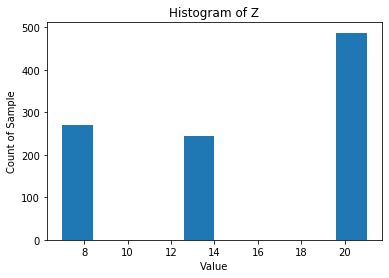

In [44]:
# 5b. np.random.choice(array): Samples uniformly from elements in the array argument.  
#Can sample a single number, or a vector/matrix/tensor according to the size argument.

X = np.array([7, 21, 21, 13])

Y = np.random.choice(X, size=(3,3))
print("Y is: \n {} \n".format(Y))

Z = np.random.choice(X, size=(1000))
plt.hist(Z)
plt.title("Histogram of Z")
plt.xlabel("Value")
plt.ylabel("Count of Sample")
plt.show()

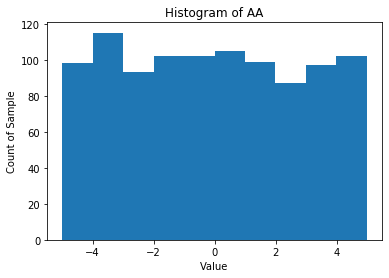

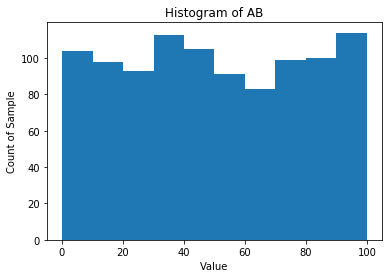

In [50]:
# 5c. np.random.uniform(low=0.0, high=1.0, size=None): Samples uniformly from the range [low, high).
#Can sample a single number, or a vector/matrix/tensor according to the size argument.

AA = np.random.uniform(low=-5, high=5, size=(1000))
plt.hist(AA, bins=10)
plt.title("Histogram of AA")
plt.xlabel("Value")
plt.ylabel("Count of Sample")
plt.show()

AB = np.random.uniform(low=0, high=100, size=(1000))
plt.hist(AB, bins=10)
plt.title("Histogram of AB")
plt.xlabel("Value")
plt.ylabel("Count of Sample")
plt.show()


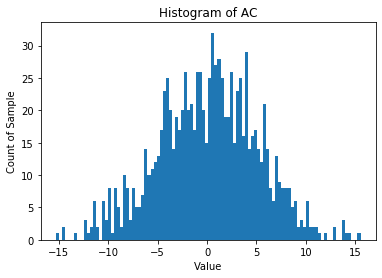

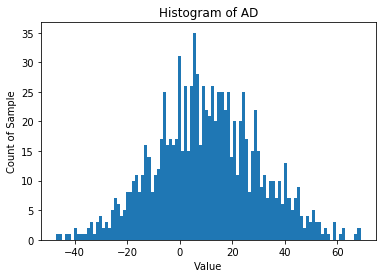

In [48]:
# 5d. numpy.random.normal(loc=0.0, scale=1.0, size=None): Samples from the Gaussian distribution, with
# loc = mean and scale = standard deviation.  Can sample a single number, or a vector/matrix/tensor 
# according to the size argument.

AC = np.random.normal(loc=0, scale=5, size=(1000))
plt.hist(AC, bins=100)
plt.title("Histogram of AC")
plt.xlabel("Value")
plt.ylabel("Count of Sample")
plt.show()

AD = np.random.normal(loc=10, scale=20, size=(1000))
plt.hist(AD, bins=100)
plt.title("Histogram of AD")
plt.xlabel("Value")
plt.ylabel("Count of Sample")
plt.show()

There are many other numpy functions that you can use for probability distributions as well!  Visit numpy's website [HERE](https://numpy.org/) to see their documentation.

### Slicing in numpy
Array slicing, or simply slicing for short, is another nice feature of numpy.  Numpy array slicing is supported for both single and multi-dimensional arrays, and also supports conditional array indexing (for example, you can return the subset of an array of elements that are greater than zero.  We can investigate slicing, as well as other functions for conditional element selection, below.